<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning Introduction - Scikit-learn API</b></font> </p><br> <font color='#559E54' size=6>Instructor Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---



# <a name="toc-13"></a> Table of contents 
1. [Data Preparation](#data-prep)
2. [Data Exploration](#data-explore)
3. [Train Test Split](#train-test-split)
4. [Feature Proprocessing](#feature-processing)
5. [Modeling Fitting](#model-fitting)
6. [Model Evaluation](#model-evaluation)
7. [Hyper-parameter Tuning](#parameter-tuning)
8. [Cross-validation](#cross-validation)

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# <a name="data-prep"></a><font color='#347B98'> 1. Data Preparation </font> <font size='3'>[Back to TOC](#toc-13)</font>

In scikit-learn, we chose a representation of data that is as close as possible to the matrix representation. Datasets are encoded as NumPy multidimensional arrays for dense data and SciPy sparse matrices for sparse data

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_data_extraction.png' width='50%'>

One of the most critical steps in machine learning and predictive modeling is to create the modeling dataset. For classic machine learning problems, we usually prepare the data into a structured table that has **`one row per user|document|image`**, and the **`columns representing the features`**, and **`one of the columns representing the labels|target`1**. 
<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_model_dataset.png' width='50%'>

## $\Delta$ 1.1 Load data

Load the data from `sklearn.datasets`, and create test and train sets.


In [4]:
from sklearn import datasets

iris = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/iris/iris.csv')

In [5]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## $\Delta$ 1.2 - Understand iris data


### <font color='#FC7307'> $\delta$ Understand the shape of the input data
    
Question:
1. What is the shape of this dataset?
2. How many features? Get a list of feature names

In [6]:
iris.shape

(150, 5)

In [5]:
iris.columns.values[:-1]

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [8]:
##################################
### Your Code Below
################################## 

print ("input data dimension: {}".format(iris.shape[1]))
print ("input data records: {}".format(iris.shape[0]))
print ("feature names: {}".format(iris.columns.values))

iris.head()

input data dimension: 5
input data records: 150
feature names: ['Sepal.Length' 'Sepal.Width' 'Petal.Length' 'Petal.Width' 'Species']


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### <font color='#FC7307'> $\delta$ Explore the target variable
Question:
1. What is the shape of the target variable?
2. How many unique categories does the `target` column have? 
3. Is the `target` categorical or numerical?

In [18]:
iris.rename(columns={'Species':'target'}, inplace=True)

In [19]:
##################################
### Your Code Below
################################## 

# explore the target variable

print ("target data format: {}".format(type(iris.target)))
print ("target variable shape: {}".format(iris.target.shape))
print ("number of target classes: {}".format(iris.target.nunique()))
print ("target variable unique values: {}".format(np.unique(iris.target, return_index=False)))

iris.target[:5]

target data format: <class 'pandas.core.series.Series'>
target variable shape: (150,)
number of target classes: 3
target variable unique values: ['setosa' 'versicolor' 'virginica']


0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target, dtype: object

### <font color='#FC7307'> $\delta$ Define the feature dataset

In [20]:
data = iris.loc[:, iris.columns.drop('target')]

In [21]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## $\Delta$ 1.3 Define Target Variable

### <font color='#FC7307'> $\delta$ Define the target variable

> In this example, the target variable has 3 levels, we will map the values into 2 distinct values (`0 vs 1`) so that we can train binary classifiers

Question:
1. Convert target column to numeric target based on the following mapping `{'setosa': 0, 'versicolor':0, 'virginica':1}`

In [22]:
##################################
### Your Code Below
##################################

# value mapping
# {'setosa': 0, 'versicolor':0, 'virginica':1}

target = pd.Series(iris.target).map({'setosa': 0, 'versicolor':0, 'virginica':1}).to_frame().rename(columns={0:'target'})

In [23]:
target.tail()

,target
145,1
146,1
147,1
148,1
149,1


---
# <a name="data-explore"></a><font color='#347B98'> 2. Data Exploration </font> <font size='3'>[Back to TOC](#toc-13)</font>

EDA (Exploratory Data Analysis) is a critical step in successful data mining. Data Scientists will gain significant intuition about the data that helps them decide the methodologies they choose for feature engineering and modeling. It typically involves univariate analysis (histograms, boxplots, etc.) and multivariate plotting. 

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_data_exploration.png' width='50%'>

### <font color='#FC7307'> $\delta$ Know your target distribution

> It is important at this stage to explore and understand your target distribution. This helps us determine if we\'re facing a imbalanced data problem. Rebalancing the target distribution is required for some algorithms. 

**Question**
1. Plot the target variable distribution using `matplotlib` or `pd.series.plot()`

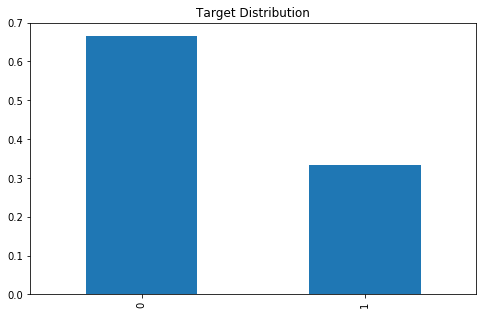

In [24]:
##################################
### Your Code Below
##################################

(target['target'].value_counts()/target.size).plot(kind='bar', title='Target Distribution', figsize=(8,5))

### <font color='#FC7307'> $\delta$ Describe Numeric Features

**Question**
- For all numeric columns, print the `size, min, max, std, 25%, 50%, 70%`

HINT:
> `describe`

In [25]:
##################################
### Your Code Below
##################################

data.describe().round(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### <font color='#FC7307'> $\delta$ Univariate - Histograms
    
**Questions**

* Plot the `histogram` of each numeric feature
* (Optional) How do we automatically get subplots of all numeric features?

HINT:
> `df.hist()`

/folders/myfolders/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/folders/myfolders/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/folders/myfolders/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/folders/myfolders/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead

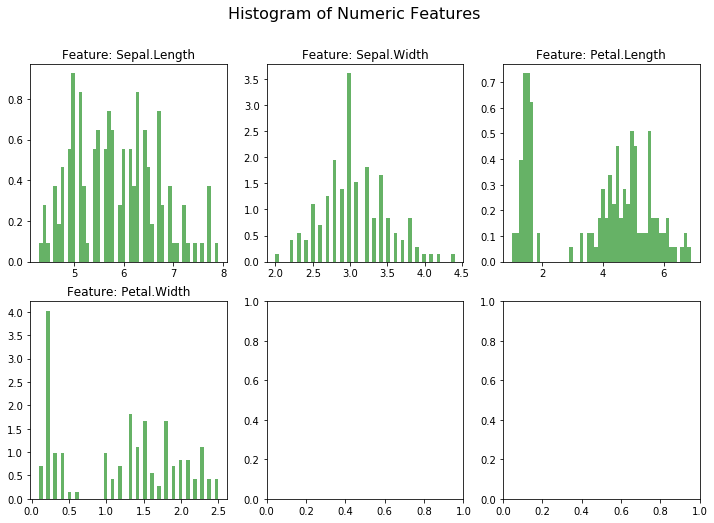

In [26]:
##################################
### Your Code Below
##################################

import math

num_features = [data.columns[i] for i in range(len(data.columns)) if data.dtypes[i]!='O']

n_num_cols = len(num_features)
n_subplot_cols = 3
n_subplot_rows = math.ceil(n_num_cols / n_subplot_cols)
fig_width = 4

#print(n_subplot_rows)
#print(n_subplot_cols)

figure, axes = plt.subplots(n_subplot_rows,
                            n_subplot_cols, 
                            figsize=(n_subplot_cols * fig_width, n_subplot_rows * fig_width)
                           )
figure.suptitle('Histogram of Numeric Features', fontsize=16)

if n_subplot_cols > 1 and n_subplot_rows > 1:
    for ix_col in range(n_num_cols):
        ix_ax_row = ix_col // n_subplot_cols 
        ix_ax_col = ix_col % n_subplot_cols
        n, bins, patches = axes[ix_ax_row][ix_ax_col].hist(data.iloc[:,ix_col], 
                                                           bins=50, 
                                                           normed=1, 
                                                           facecolor='g', 
                                                           alpha=0.6)
        axes[ix_ax_row][ix_ax_col].set_title('Feature: {}'.format(num_features[ix_col]))
else:
    for ix_col in range(n_num_cols):
        n, bins, patches = axes[ix_col].hist(data.iloc[:,ix_col], 
                                             bins=50, 
                                             normed=1, 
                                             facecolor='g', 
                                             alpha=0.6)
        axes[ix_col].set_title('Feature: {}'.format(num_features[ix_col]))

plt.show()

### <font color='#FC7307'> $\delta$ Univariate - Boxplot
    
**Question**
- Use `seaborn`'s `sns.boxplot` to plot the boxplot 

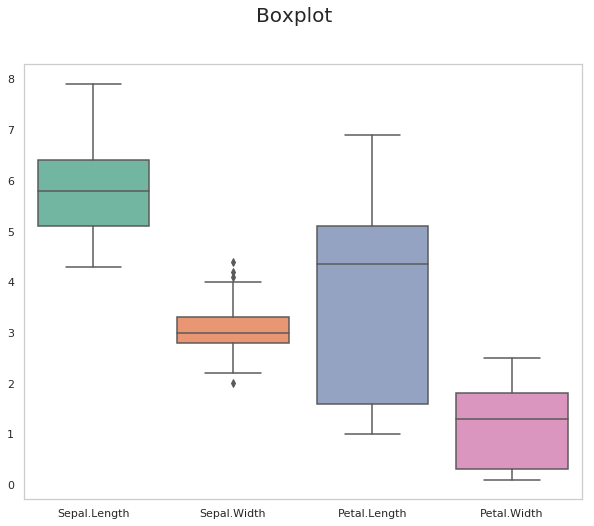

In [27]:
##################################
### Your Code Below
##################################

sns.set(rc={'figure.figsize':(10, 8)})
sns.set_style("whitegrid", {'axes.grid' : False})

plt.suptitle('Boxplot', fontsize=20)

_ = sns.boxplot(data=data, 
                orient="v", 
                palette="Set2")

### <font color='#FC7307'> $\delta$ Scatter Matrix

#### Scatterplot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


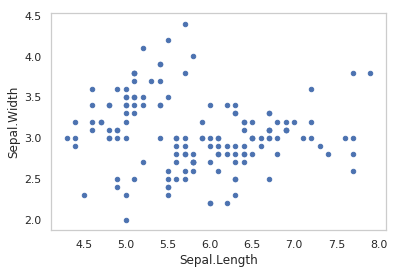

In [31]:
data.plot.scatter(x="Sepal.Length", y="Sepal.Width", figsize=(6,4))

plt.show()

#### Scatter Matrix

Text(0.5, 0.98, 'Scatter-Matrix')

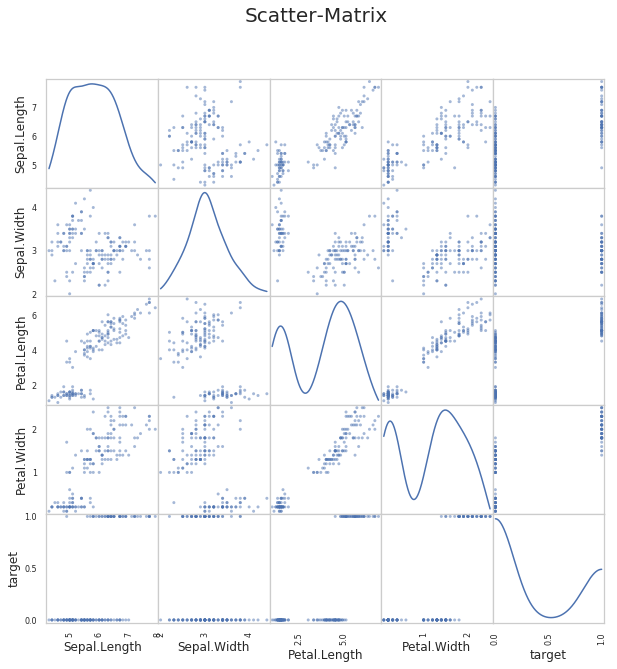

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(pd.merge(data, target, left_index=True, right_index=True), alpha=0.5, figsize=(10,10), diagonal='kde')
plt.suptitle('Scatter-Matrix', fontsize=20)

#### Scatterplot with target class overlay

/folders/myfolders/.local/lib/python3.5/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


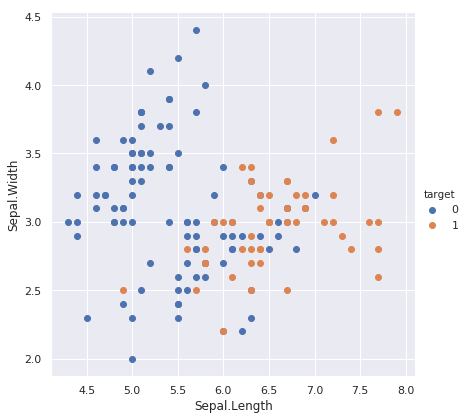

In [34]:
plt.style.use('ggplot')

sns.set(rc={'figure.figsize':(10, 8)})

(sns.FacetGrid(data.merge(target, left_index=True, right_index=True), 
               hue='target',
               size=6)
    .map(plt.scatter, "Sepal.Length", "Sepal.Width")
    .add_legend()
)
plt.show()

---
# <a name="train-test-split"></a><font color='#347B98'> 3. Train/Test Split </font> <font size='3'>[Back to TOC](#toc-13)</font>

    
<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_train_test_split.png' width='40%'>

In [35]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [36]:
target.head()

,target
0,0
1,0
2,0
3,0
4,0


## $\Delta$ 3.1 - Train Test Split

### <font color='#FC7307'> $\delta$ Train/Test Split
    
- Create training/testing splits by leveraging sklearn's `train_test_split` function

In [37]:
data = data.values
target = target.values.ravel()
print(data.shape)
print(target.shape)

(150, 4)
(150,)


In [38]:
from sklearn.model_selection import train_test_split

##################################
### Your Code Below
##################################

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=2018)

In [39]:
print ("training X data shape: {}".format(len(X_train)))
print ("testing X data shape: {}".format(len(X_test)))

print ("training y data shape: {}".format(len(y_train)))
print ("testing y data shape: {}".format(len(y_test)))

training X data shape: 105
testing X data shape: 45
training y data shape: 105
testing y data shape: 45


---
# <a name="feature-processing"></a><font color='#347B98'> 4. Feature Preprocessing & Engineering </font> <font size='3'>[Back to TOC](#toc-13)</font>

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_feature_engineering.png' width='50%'>

## $\Delta$ 4.1 `Normalization`

To standardize the input X train to zero mean and unit variance before fitting the estimator, we can try the `StandardScaler()`

### <font color='#FC7307'> $\delta$ Instantiate the scaler

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

print (scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [41]:
#help(scaler)

### <font color='#FC7307'> $\delta$ `fit` the transformer

In [42]:
help(scaler.fit)

Help on method fit in module sklearn.preprocessing.data:

fit(X, y=None) method of sklearn.preprocessing.data.StandardScaler instance
    Compute the mean and std to be used for later scaling.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data used to compute the mean and standard deviation
        used for later scaling along the features axis.
    
    y
        Ignored



In [43]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
# get StandardScaler transformer stats
print (scaler.scale_)
print (scaler.mean_)
print (scaler.var_)

[0.81375366 0.39716227 1.73342857 0.74184669]
[5.89047619 3.03047619 3.84666667 1.22666667]
[0.66219501 0.15773787 3.0047746  0.55033651]


### <font color='#FC7307'> $\delta$ Apply the transformations on both training and testing sets

#### Scale the training data

In [45]:
X_train_scale = scaler.transform(X_train)

print ("training data: \n {}".format(X_train[:5, :]))
print ("training data after transformation: \n {}".format(X_train_scale[:5, :]))

training data: 
 [[5.7 3.8 1.7 0.3]
 [6.3 3.3 4.7 1.6]
 [6.9 3.2 5.7 2.3]
 [5.7 3.  4.2 1.2]
 [6.9 3.1 4.9 1.5]]
training data after transformation: 
 [[-0.23407107  1.93755517 -1.2383935  -1.24913501]
 [ 0.5032528   0.6786239   0.49228064  0.50324864]
 [ 1.24057668  0.42683765  1.06917203  1.44683983]
 [-0.23407107 -0.07673486  0.20383495 -0.03594633]
 [ 1.24057668  0.1750514   0.60765892  0.36844989]]


#### Scale the testing data

In [46]:
X_test_scale = scaler.transform(X_test)

In [47]:
print ("testing data: \n {}".format(X_test[:5, :]))
print ("testing data after transformation: \n {}".format(X_test_scale[:5, :]))

testing data: 
 [[5.4 3.4 1.7 0.2]
 [5.5 2.3 4.  1.3]
 [5.6 3.  4.5 1.5]
 [6.  2.2 4.  1. ]
 [5.1 3.7 1.5 0.4]]
testing data after transformation: 
 [[-0.60273301  0.93041016 -1.2383935  -1.38393375]
 [-0.4798457  -1.83923863  0.08845668  0.09885241]
 [-0.35695838 -0.07673486  0.37690237  0.36844989]
 [ 0.13459087 -2.09102489  0.08845668 -0.30554381]
 [-0.97139495  1.68576892 -1.35377177 -1.11433626]]


#### Validating the scaled features

In [48]:
X_train_scale[:,:].mean(axis=0)

array([-4.41974499e-16, -1.66929962e-16,  4.56777473e-16,  1.14194368e-16])

In [49]:
X_train_scale[:,:].std(axis=0)

array([1., 1., 1., 1.])

---

# <a name="model-fitting"></a><font color='#347B98'> 5. Modeling Fitting</font> <font size='3'>[Back to TOC](#toc-13)</font>

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_sklearn_cheat_sheet.png' width='50%'>

## $\Delta$ 5.1 - Scikit-learn Estimator

The estimator interface defines instantiation mechanisms of objects and exposes a fit method for learning a model from training data.   
All supervised and unsupervised learning algorithms are offered as objects implementing this interface. 
- Estimator initialization and actual learning are strictly separated
- The `constructor of an estimator does not see any actual data`, nor does it perform any actual learning. 
  - All it does is attach the given parameters to the object. 
- Actual learning is performed by the **`fit`** method. This method is called with training data (trainX, trainY). 

As a convention, the parameters learned by an estimator are exposed as public attributes with `names suffixed with a trailing underscore`(e.g., coef_ for the learned coefficients of a linear model), again to facilitate model inspection. 


## $\Delta$ 5.2 - KNN Estimator

In [50]:
# import the KNN model
import sklearn
from sklearn.neighbors import KNeighborsClassifier

### <font color='#FC7307'> $\delta$ Instantiate a KNN model

Here is a [tutorial](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) on K-Nearest-Neighbors (KNN).

In [51]:
# instantiate knn classifier with default setting
knn = KNeighborsClassifier(n_neighbors=10)
print ("KNN Classifer with Default Setting: \n {}".format(knn))

KNN Classifer with Default Setting: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')


In [52]:
# get help on model parameters
#help(knn)

In [53]:
#help(sklearn.neighbors.DistanceMetric)

### <font color='#FC7307'> $\delta$ Fit an estimator


[Sklearn documents on KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [54]:
y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [56]:
kneighbors = knn.kneighbors([[1.0, 1.0, 1.0, 1.0]])
print ("distance to k neighbors: {}".format(kneighbors[0]))
print ("indices of the k nearest neighbors: {}".format(kneighbors[1]))
# note that k = 5 (as default)

distance to k neighbors: [[3.96358424 4.03608721 4.13884042 4.27317212 4.31277173 4.36921045
  4.40113622 4.41927596 4.45533388 4.47325385]]
indices of the k nearest neighbors: [[60 91 95 10 38 71 73 78 18  6]]


### <font color='#FC7307'> $\delta$ Make Predictions


In [57]:
knn.predict(X_train)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

---
# <a name="model-evaluation"></a><font color='#347B98'> 6. Model Evaluation </font> <font size='3'>[Back to TOC](#toc-13)</font>

    
<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_model_evaluation.png' width='30%' align='left'><img src='https://s3.amazonaws.com/weclouddata/images/python/ml_model_evaluation_cross_validation.png' width='30%' align='center'>

## $\Delta$ 6.1 - Generate model predictions

### <font color='#FC7307'> $\delta$ Generate predictions

In [58]:
# make predictions on testing set
predictions = knn.predict(X_test)

In [59]:
print ("model predictions on test data: \n {}".format(predictions))

model predictions on test data: 
 [0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 1 0]


## $\Delta$ 6.2 - Evaluate prediction results

### <font color='#FC7307'> $\delta$ Evaluate prediction results

In [60]:
# Check out the real target on test set
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1])

In [61]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0])

In [62]:
# compare predictions against real value
predictions == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [63]:
# Print out the accuracy of the classifier on the test set
accuracy = sum(predictions == y_test) / float(len(y_test))
print (accuracy)

0.9555555555555556


In [64]:
print ("The knn model correctly classified {} cases".format(sum(predictions == y_test)))
print ("Model accuracy is: {}".format(accuracy))

The knn model correctly classified 43 cases
Model accuracy is: 0.9555555555555556


### <font color='#FC7307'> $\delta$ Evaluate accuracy with `score` function

In [65]:
knn.score(X_test, y_test)

0.9555555555555556

In [66]:
#help(knn.score)

** Questions **

- Fit a KNN (k=10) model on the normalized training data (`X_train_scale`)
- Evaluate the model and see if the results get better

In [67]:
##################################
### Your Code Below
##################################

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scale, y_train)
prediction_scale = knn.predict(X_test_scale)
accuracy = sum(prediction_scale == y_test) / float(len(y_test))
print (accuracy)

0.9777777777777777


In [68]:
knn.score(X_test_scale, y_test)

0.9777777777777777

---
# <a name="parameter-tuning"></a><font color='#347B98'> 7. Hyperparameter Tuning </font> <font size='3'>[Back to TOC](#toc-13)</font>


## 7.1 - Parameter Search
<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_gridsearch.png' width='50%'>

Define a function `parameter_search_knn` that takes in a parameter k and returns a tuple of `(k, accuracy)`. Note that we'll load the data from `sklearn.datasets`, and we'll create train and test splits using `sklearn.cross_validation.train_test_split`.

In [69]:
def parameter_search_knn(X_train, y_train, X_test, y_test, k):
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate predictions and accuracy
    predictions = knn.predict(X_test)
    accuracy = (predictions == y_test).sum() / float(len(y_test))
    
    return (k, accuracy)   

Now we'll run a grid search for k from 1 to 10.


In [70]:
hist = []
for n in range(1,21):
    hist.append(parameter_search_knn(X_train_scale, y_train, X_test_scale, y_test, n))

In [71]:
hist

[(1, 0.9555555555555556),
 (2, 0.9555555555555556),
 (3, 0.9777777777777777),
 (4, 0.9555555555555556),
 (5, 0.9777777777777777),
 (6, 0.9555555555555556),
 (7, 0.9555555555555556),
 (8, 0.9555555555555556),
 (9, 0.9777777777777777),
 (10, 0.9777777777777777),
 (11, 0.9777777777777777),
 (12, 0.9777777777777777),
 (13, 0.9777777777777777),
 (14, 0.9555555555555556),
 (15, 0.9777777777777777),
 (16, 0.9777777777777777),
 (17, 0.9777777777777777),
 (18, 0.9777777777777777),
 (19, 0.9777777777777777),
 (20, 0.9333333333333333)]

In [72]:
for model in hist:
    print ("model {0}, accuracy: {1}".format(model[0], model[1]))

model 1, accuracy: 0.9555555555555556
model 2, accuracy: 0.9555555555555556
model 3, accuracy: 0.9777777777777777
model 4, accuracy: 0.9555555555555556
model 5, accuracy: 0.9777777777777777
model 6, accuracy: 0.9555555555555556
model 7, accuracy: 0.9555555555555556
model 8, accuracy: 0.9555555555555556
model 9, accuracy: 0.9777777777777777
model 10, accuracy: 0.9777777777777777
model 11, accuracy: 0.9777777777777777
model 12, accuracy: 0.9777777777777777
model 13, accuracy: 0.9777777777777777
model 14, accuracy: 0.9555555555555556
model 15, accuracy: 0.9777777777777777
model 16, accuracy: 0.9777777777777777
model 17, accuracy: 0.9777777777777777
model 18, accuracy: 0.9777777777777777
model 19, accuracy: 0.9777777777777777
model 20, accuracy: 0.9333333333333333


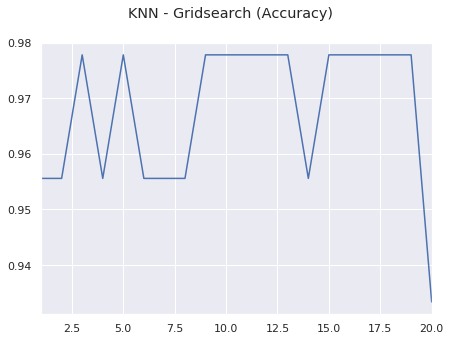

In [73]:
plt.suptitle('KNN - Gridsearch (Accuracy)')
pd.Series([x[1] for x in hist], index=range(1,21,1)).plot(figsize=(7,5))

---

# <a name="cross-validation"></a><font color='#347B98'> 8. Cross-Validation </font> <font size='3'>[Back to TOC](#toc-13)</font>

    
Reference: https://sebastianraschka.com/blog/2016/model-evaluation-selection-part3.html

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_cross_validation.png' width='50%'>

## $\Delta$ 8.1 - Cross-Validation

Now we'll use sklearn.cross_validation.KFold to evaluate our model using 10-fold cross validation. First, generate the 10 folds using KFold.

Read more: [cross-validation: evaluating estimator performance](http://scikit-learn.org/stable/modules/cross_validation.html)

### <font color='#FC7307'> Generating the K Folds

In [113]:
#help(KFold)

In [74]:
from sklearn.model_selection import KFold

# Create indicies for 10-fold cross validation
kf = KFold(n_splits=5, random_state=2018, shuffle=True)

In [75]:
kf

KFold(n_splits=5, random_state=2018, shuffle=True)

### <font color='#FC7307'> Peeking into the KFolds

In [76]:
X = X_train.copy()
y = y_train.copy()
for i, (cv_train_index, cv_test_index) in enumerate(kf.split(X)):
    cv_X_train, cv_X_test = X[cv_train_index], X[cv_test_index]
    cv_y_train, cv_y_test = y[cv_train_index], y[cv_test_index]
    print("Fold {} \n----------\n".format(i+1))
    print("TRAIN:", cv_train_index, '\n' "TEST:", cv_test_index, '\n')
    print("TRAIN SIZE:", len(cv_train_index), ' | ', 'TEST SIZE:', len(cv_test_index), '\n')

Fold 1 
----------

TRAIN: [  0   1   3   4   5   6   8   9  10  12  13  14  15  16  19  20  21  22
  24  25  26  27  28  29  30  31  34  35  36  37  38  39  40  41  42  44
  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  63
  64  66  67  69  71  72  75  77  78  79  81  82  83  84  85  87  88  89
  90  91  92  94  95  96  97  98 100 102 103 104] 
TEST: [  2   7  11  17  18  23  32  33  43  62  65  68  70  73  74  76  80  86
  93  99 101] 

TRAIN SIZE: 84  |  TEST SIZE: 21 

Fold 2 
----------

TRAIN: [  0   1   2   3   4   6   7   8   9  10  11  12  13  16  17  18  19  20
  21  22  23  24  25  26  28  29  31  32  33  34  35  38  39  40  42  43
  45  47  49  50  53  54  55  58  59  60  62  63  64  65  66  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  83  84  85  86  87  88  89
  90  92  93  94  95  96  97  98  99 101 102 103] 
TEST: [  5  14  15  27  30  36  37  41  44  46  48  51  52  56  57  61  67  82
  91 100 104] 

TRAIN SIZE: 84  |  TEST SIZE: 21 



### <font color='#FC7307'> Run Cross-Validation with KNN

Create a function that runs nearest neighbors based on the fold information passed in. Note that we'll have the function return an np.array which provides us with additional functionality that we'll take advantage of in a couple steps.

In [77]:
import numpy as np

def nfold_cv_knn(foldsindex, X, y):
    # Assign training and test sets from irisBroadcast using trainIndex and testIndex
    trainIndex = foldsindex[0]
    testIndex = foldsindex[1]
    XTrain = X[trainIndex]
    yTrain = y[trainIndex]
    XTest = X[testIndex]
    yTest = y[testIndex]
    
    # Build the model
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(XTrain, yTrain)
    
    # Calculate predictions
    predictions = knn.predict(XTest)
    
    # Compute the number of correct predictions and total predictions
    correct = (predictions == yTest).sum() 
    total = len(testIndex)
    
    # Return an np.array of the number of correct predictions and total predictions
    return np.array([correct, total])

Computer nearest neighbors using each fold.


In [78]:
# run KNN classifiers on the folds
cv_out = []

X = X_train.copy()
y = y_train.copy()

for fold in kf.split(X):
    cv_out.append(nfold_cv_knn(fold, X, y))

In [79]:
cv_out

[array([20, 21]),
 array([18, 21]),
 array([20, 21]),
 array([20, 21]),
 array([21, 21])]

In [80]:
# Run nearest neighbors on each of the folds
print('correct / total\n' + '\n'.join(map(str, cv_out)))

correct / total
[20 21]
[18 21]
[20 21]
[20 21]
[21 21]


Now aggregate the results from the folds to see overall accuracy

In [81]:
np.array(cv_out).shape

(5, 2)

In [82]:
# Print the cross-valiation results

correct = np.array(cv_out)[:, 0].sum()
total = np.array(cv_out)[:, 1].sum()

print(correct / float(total))

0.9428571428571428


## $\Delta$ Exercises

Try to fit a logistic regression model to classify iris data
    1. import LogisticRegression from scikit-learns linear model module 
    2. construct a LR model 
    3. fit the model on training 
    4. generate prediction and then evaluate model accurary
    5. try cross-validation on the Logistic Regression model and evaluate the result

In [124]:
##############################
## Your Code Here
##############################

In [83]:
from sklearn.linear_model import LogisticRegression

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [84]:
#help(LogisticRegression)

In [85]:
lr = LogisticRegression(C=10)

In [86]:
lr.fit(X_train_scale, y_train)

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [87]:
lr_predictions = lr.predict(X_test_scale)
accuracy = (lr_predictions == y_test).sum() / float(len(y_test))

In [88]:
print("Logistic Regression Accuracy: {}".format(accuracy))

Logistic Regression Accuracy: 1.0


In [89]:
import numpy as np

def nfold_cv_lr(foldsindex, X, y):
    # Assign training and test sets from irisBroadcast using trainIndex and testIndex
    trainIndex = foldsindex[0]
    testIndex = foldsindex[1]
    XTrain = X[trainIndex]
    yTrain = y[trainIndex]
    XTest = X[testIndex]
    yTest = y[testIndex]
    
    # Build the model
    lr = LogisticRegression(C=10)
    lr.fit(XTrain, yTrain)
    
    # Calculate predictions
    predictions = lr.predict(XTest)
    
    # Compute the number of correct predictions and total predictions
    correct = (predictions == yTest).sum() 
    total = len(testIndex)
    
    # Return an np.array of the number of correct predictions and total predictions
    return np.array([correct, total])

In [90]:
# run LR classifiers on the folds
lr_cv_out = []

X = X_train.copy()
y = y_train.copy()

for fold in kf.split(X):
    lr_cv_out.append(nfold_cv_lr(fold, X, y))

/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/folders/myfolders/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [91]:
lr_cv_out

[array([21, 21]),
 array([19, 21]),
 array([20, 21]),
 array([21, 21]),
 array([20, 21])]

In [92]:

correct = np.array(lr_cv_out)[:, 0].sum()
total = np.array(lr_cv_out)[:, 1].sum()

print(correct / float(total))

0.9619047619047619
